<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Для воспроизводимости результата

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [9]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [11]:
df_train.sample(n=10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [12]:
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [13]:
df_test.tail(5)

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [14]:
df_train_missing_counts = df_train.isnull().sum()
df_train_missing_counts = df_train_missing_counts[df_train_missing_counts > 0]

df_test_missing_counts = df_test.isnull().sum()
df_test_missing_counts = df_test_missing_counts[df_test_missing_counts > 0]

print("Колонки с пропущенными значениями и количество пропусков (тренировочный):")
print(df_train_missing_counts)

print("Колонки с пропущенными значениями и количество пропусков (тестовый):")
print(df_test_missing_counts)

Колонки с пропущенными значениями и количество пропусков (тренировочный):
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64
Колонки с пропущенными значениями и количество пропусков (тестовый):
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64


In [15]:
df_train_duplicates = df_train.duplicated().sum()
df_test_duplicates = df_test.duplicated().sum()

print(f"Явные дубликаты (тренировочный): {df_train_duplicates}")
print(f"Явные дубликаты (тестовый): {df_test_duplicates}")

Явные дубликаты (тренировочный): 985
Явные дубликаты (тестовый): 62


In [16]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="Мой первый дашборд")
profile
# profile.to_file("report.html") # будет приложен

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [18]:
# Тут я немного поспешил и обработал колонки mileage, engine и max_power
# mileage может быть km/kg и kmpl. Я использовал коэффициэнт 0.8 для приведения литров бензина в килограммы

In [19]:
def convert_to_kmpl(value):
    if isinstance(value, str):
        if 'km/kg' in value:
            return float(value.replace(' km/kg', '')) * 0.8
        else:
            return float(value.replace(' kmpl', ''))
    else:
        return value

def remove_empty(value):
    if isinstance(value, float):
        return value

    if not value:
        return None
    else:
        new_val = value.replace(' bhp', '')
        if new_val:
            return float(new_val)
        else:
            return None

df_train_fixed = df_train.copy()
df_train_fixed['mileage'] = df_train_fixed['mileage'].apply(convert_to_kmpl)
df_train_fixed['engine'] = df_train_fixed['engine'].str.replace(' CC', '').astype(float)
df_train_fixed['max_power'] = df_train_fixed['max_power'].apply(remove_empty)

df_test_fixed = df_test.copy()
df_test_fixed['mileage'] = df_test_fixed['mileage'].apply(convert_to_kmpl)
df_test_fixed['engine'] = df_test_fixed['engine'].str.replace(' CC', '').astype(float)
df_test_fixed['max_power'] = df_test_fixed['max_power'].apply(remove_empty)

for column in df_train_fixed.select_dtypes(include=["float64", "int64"]).columns:
    df_train_fixed[column] = df_train_fixed[column].fillna(df_train_fixed[column].median())
    df_test_fixed[column] = df_test_fixed[column].fillna(df_train_fixed[column].median())

df_train_missing_counts = df_train_fixed.isnull().sum()
print(df_train_missing_counts)
df_test_missing_counts = df_test_fixed.isnull().sum()
print(df_test_missing_counts)

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
torque           203
seats              0
dtype: int64
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque           19
seats             0
dtype: int64


In [20]:
# torque нельзя привести к числовому, т.к. его содержимое сложней, чем просто число и единица измерения

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [22]:
print("Количество объектов с одинаковым признаковым описанием:")
df_train_fixed.drop('selling_price', axis=1).duplicated().sum()

Количество объектов с одинаковым признаковым описанием:


1159

In [23]:
df_train_fixed[df_train_fixed.drop('selling_price', axis=1).duplicated()].sort_values(by=['name'])

name  year  selling_price  km_driven  \
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6640            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1595            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
2787            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
6778        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
3623        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
2293        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
947         Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

        fuel seller_type transmission        owner  mileage  engine  \
6307  Diesel      Dealer    Automatic  First Owner    15.73  1968.0   
6704  Diesel  Individual    Automatic  First Owner    13.22  2967.0   
6640  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
1595  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
2787  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
...      ...         ...          ...          ...      ...     ...   
6778  Diesel  Individual    Automatic  First Owner    18.00  1969.0   
3623  Diesel  Individual    Automatic  First Owner    18.00  1969.0   
2293  Diesel  Individual    Automatic  First Owner    18.00  1969.0   
5652  Diesel  Individual    Automatic  First Owner    18.00  1969.0   
947   Diesel  Individual    Automatic  First Owner    18.00  1969.0   

      max_power               torque  seats  
6307     174.33  380Nm@ 1750-2500rpm    5.0  
6704     241.40  580Nm@ 1400-3250rpm    5.0  
6640     188.00  400nm@ 1750-3000rpm    5.0  
1595     188.00  400nm@ 1750-3000rpm    5.0  
2787     188.00  400nm@ 1750-3000rpm    5.0  
...         ...                  ...    ...  
6778     190.00                400Nm    5.0  
3623     190.00                400Nm    5.0  
2293     190.00                400Nm    5.0  
5652     190.00                400Nm    5.0  
947      190.00                400Nm    5.0  

[1159 rows x 13 columns]

In [24]:
df_train_fixed = df_train_fixed[df_train_fixed.drop('selling_price', axis=1).duplicated() == False]
df_train_fixed = df_train_fixed.reset_index(drop=True)

In [25]:
assert df_train_fixed.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [27]:
df_train_fixed = df_train_fixed.drop('torque', axis=1)
df_test_fixed = df_test_fixed.drop('torque', axis=1)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [29]:
def convert_to_int(value):
    return int(value)

df_train_fixed['engine'] = df_train_fixed['engine'].apply(convert_to_int)
df_train_fixed['seats'] = df_train_fixed['seats'].apply(convert_to_int)

df_test_fixed['engine'] = df_test_fixed['engine'].apply(convert_to_int)
df_test_fixed['seats'] = df_test_fixed['seats'].apply(convert_to_int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [31]:
df_train_fixed.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.370942  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.961524   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.070000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.910782     5.426712  
std      31.639585     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [32]:
df_train_fixed.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [33]:
df_test_fixed.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.300082  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.944199   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.515000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    28.400000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.844330     5.403000  
std      34.892709     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [34]:
df_test_fixed.describe(include='object')

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [35]:
assert df_train_fixed.shape == (5840, 12) # мы удалили torque

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

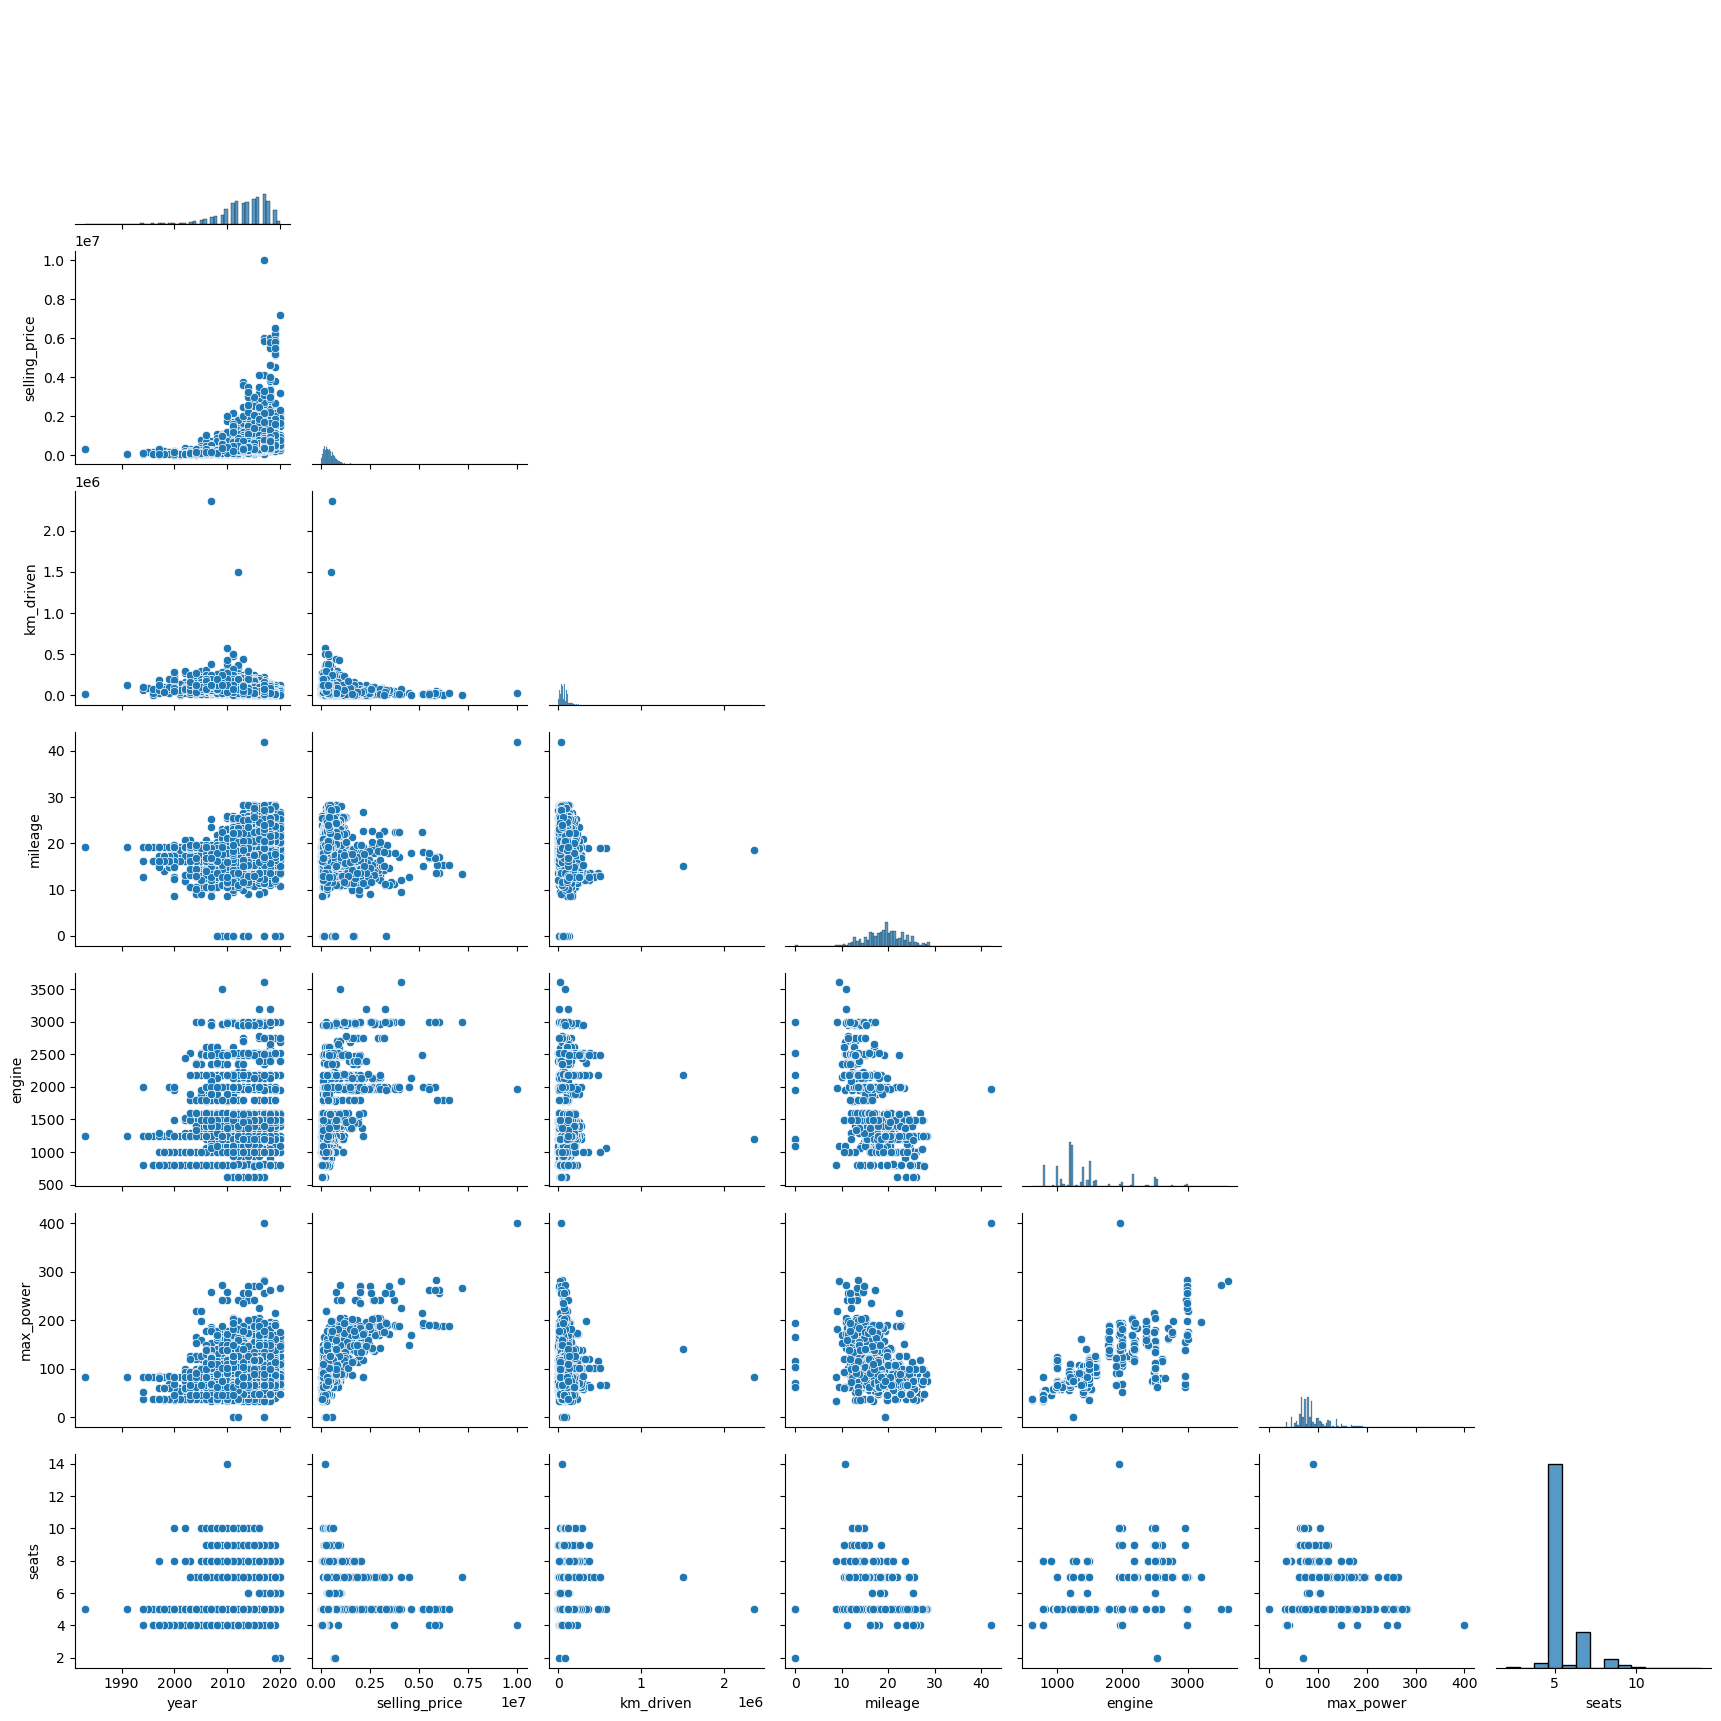

In [39]:
%matplotlib inline

sns.pairplot(df_train_fixed, diag_kind='hist', corner=True)
plt.show()

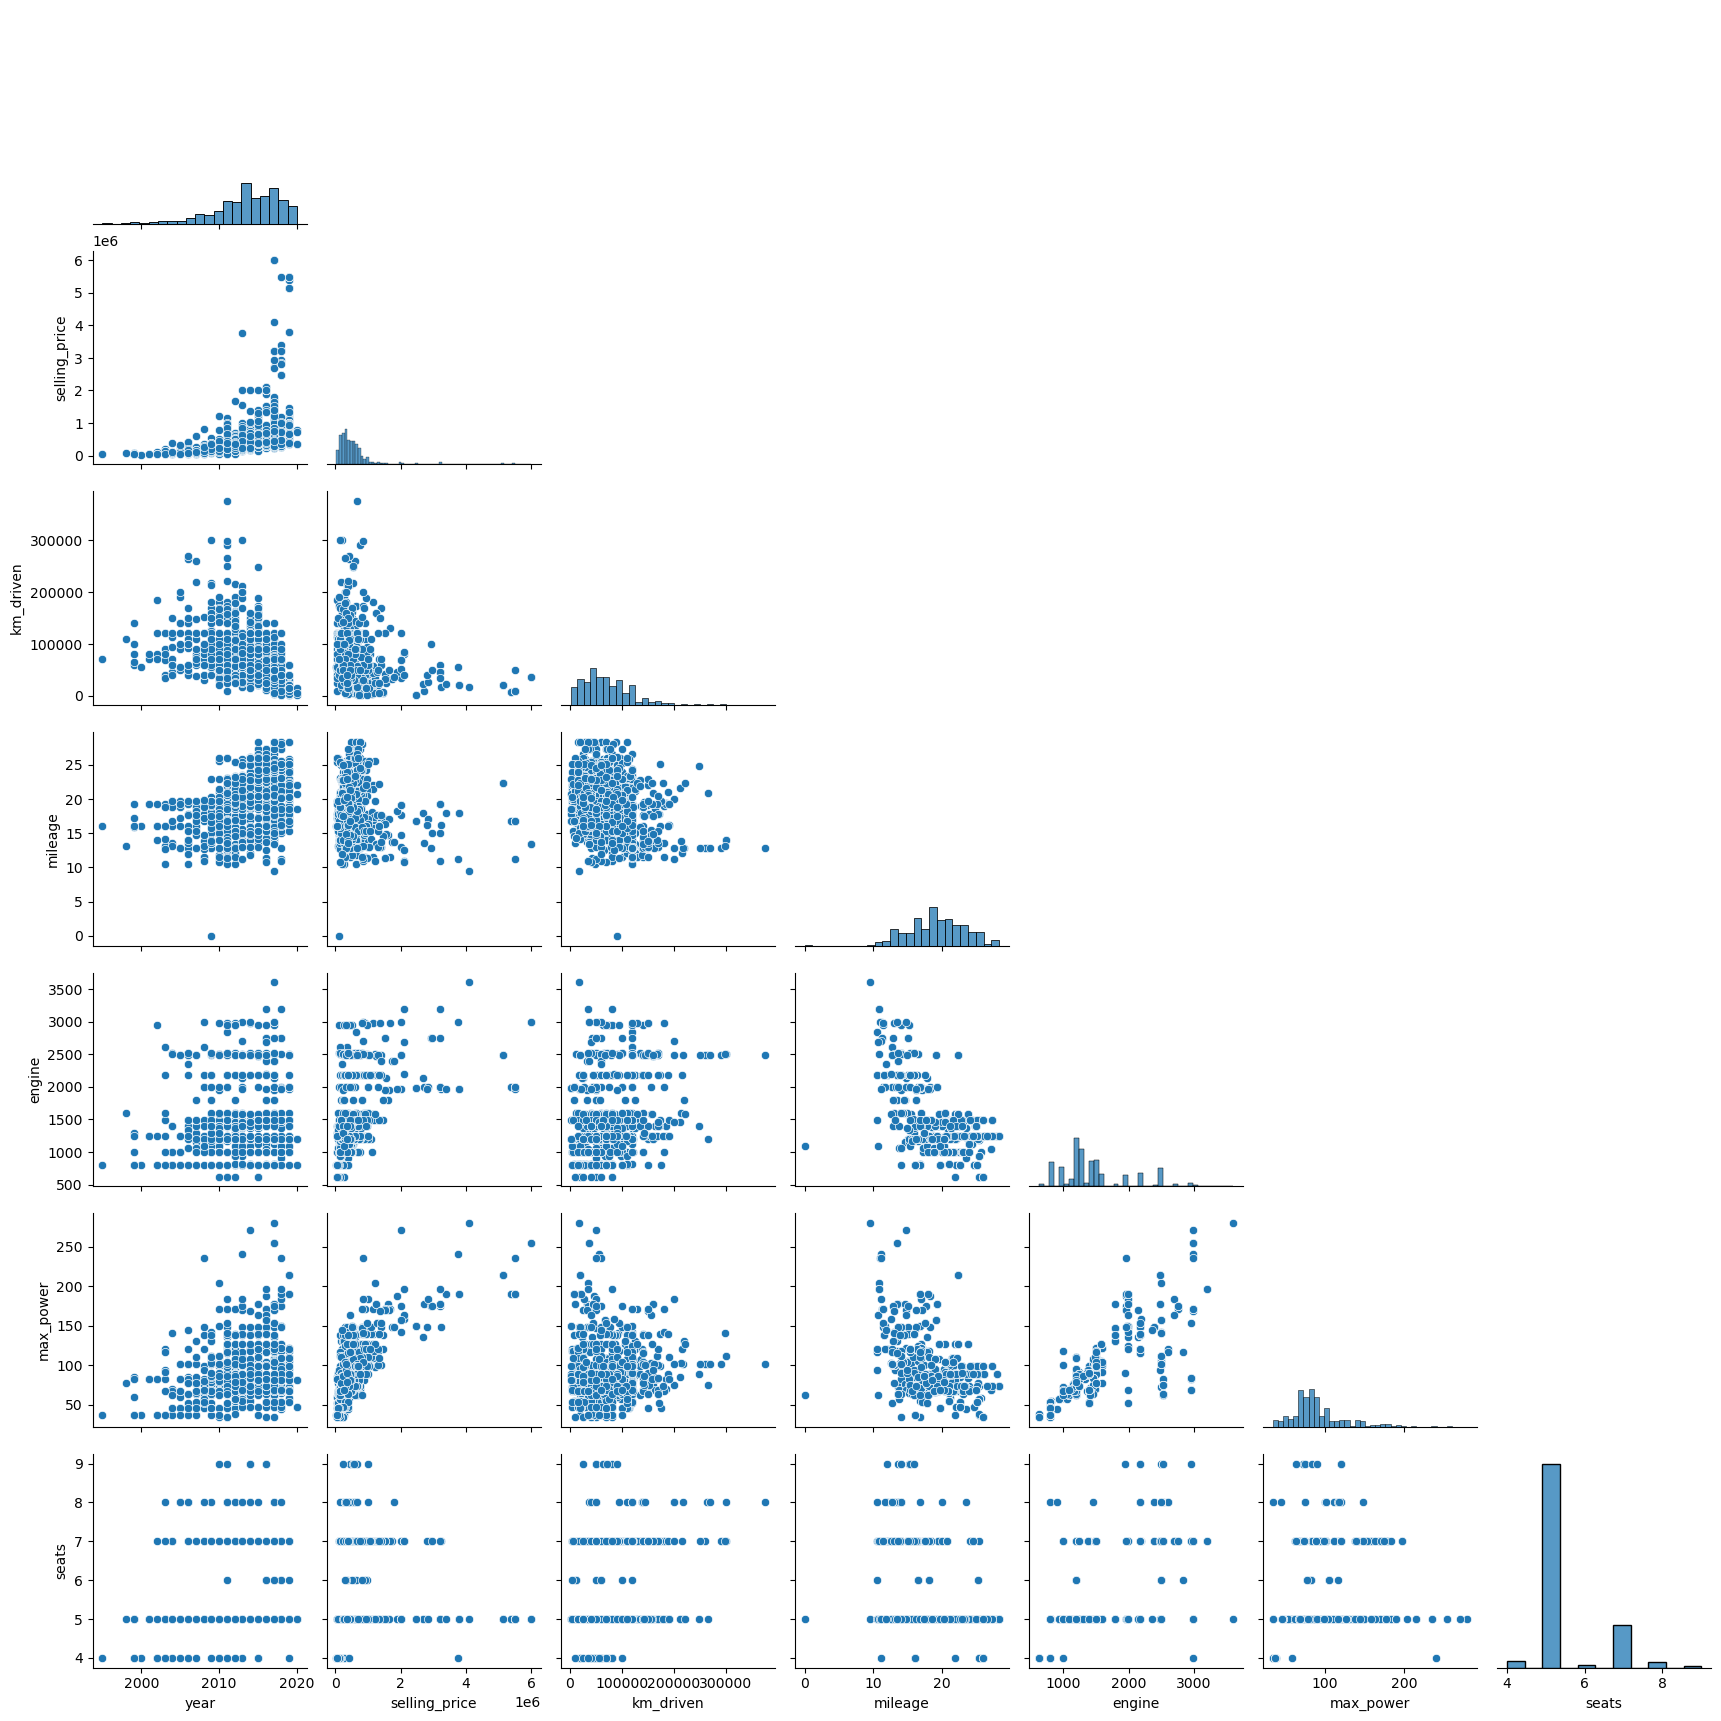

In [40]:
sns.pairplot(df_test_fixed, diag_kind='hist', corner=True)
plt.show()

По графикам я предполагаю прямую связь с max_power и engine и обратную с km_driven
Хотелось бы увидеть линейную зависимосить, но увы

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


                   year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.343526  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.098469  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.183285  0.229766   
mileage        0.343526      -0.098469  -0.183285  1.000000 -0.564721   
engine         0.002819       0.447672   0.229766 -0.564721  1.000000   
max_power      0.156648       0.692754   0.024630 -0.362448  0.681082   
seats          0.041178       0.149953   0.192328 -0.447375  0.652172   

               max_power     seats  
year            0.156648  0.041178  
selling_price   0.692754  0.149953  
km_driven       0.024630  0.192328  
mileage        -0.362448 -0.447375  
engine          0.681082  0.652172  
max_power       1.000000  0.244060  
seats           0.244060  1.000000  


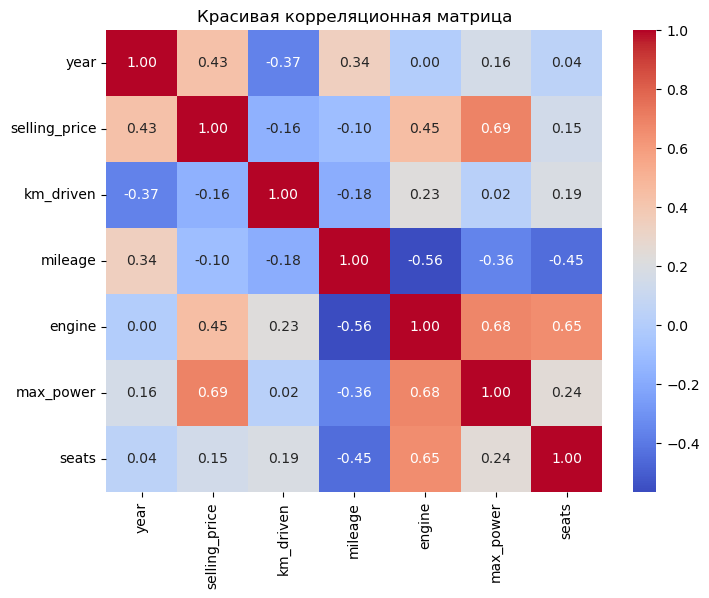

In [43]:
correlation_matrix = df_train_fixed.select_dtypes(include=['number', 'float']).corr(method='pearson')
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Красивая корреляционная матрица")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- year и engine наименее скоррелированы между собой
- сильная зависимость между max_power и selling_price, но, судя по предыдущим графикам, исльная ЛИНЕЙНАЯ зависимость скорее между max_power и engine.
- скорее да. корреляция положительная, но небольшая

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

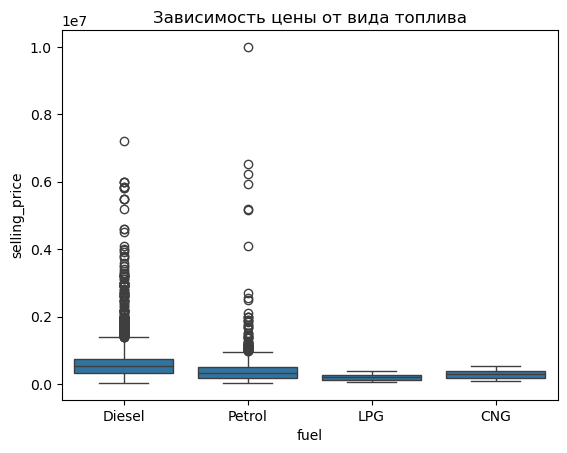

In [47]:
# мы могли бы изобразить зависимость целевой переменной от категриальных признаков. например, цена явно зависит от вида топлива.

sns.boxplot(x='fuel', y='selling_price', data=df_train_fixed)
plt.title("Зависимость цены от вида топлива")
plt.show()

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [50]:
y_train = df_train_fixed[['selling_price']].copy()
X_train = df_train_fixed[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']].copy()

In [51]:
assert X_train.shape == (5840, 6)

In [52]:
y_test = df_test_fixed[['selling_price']].copy()
X_test = df_test_fixed[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']].copy()

In [53]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = MSE(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")

results = {}
results['LinearRegression'] = y_pred

R²: 0.5940
MSE: 233387421187.85


Значение R2 около 59% говорит о том, что модель работает, но не может найти все закономерности в данных

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = MSE(y_test, y_pred)
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")

results['StandardScaler_LinearRegression'] = y_pred

R²: 0.5940
MSE: 233387421187.84


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [60]:
pd.DataFrame(X_train_scaled, columns=['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']).describe()

year     km_driven       mileage        engine     max_power  \
count  5.840000e+03  5.840000e+03  5.840000e+03  5.840000e+03  5.840000e+03   
mean   2.328122e-14 -6.205082e-17 -3.601381e-16 -1.301851e-16  1.131515e-16   
std    1.000086e+00  1.000086e+00  1.000086e+00  1.000086e+00  1.000086e+00   
min   -7.430137e+00 -1.231167e+00 -4.890188e+00 -1.658595e+00 -2.778744e+00   
25%   -5.929826e-01 -5.818974e-01 -6.111660e-01 -4.786631e-01 -6.293536e-01   
50%    1.395696e-01 -6.579834e-02 -1.790923e-02 -3.736430e-01 -1.912572e-01   
75%    8.721218e-01  4.336523e-01  6.813764e-01  1.411615e-01  3.505156e-01   
max    1.604674e+00  3.806654e+01  5.712699e+00  4.477875e+00  9.864729e+00   

              seats  
count  5.840000e+03  
mean   2.640202e-16  
std    1.000086e+00  
min   -3.488601e+00  
25%   -4.344190e-01  
50%   -4.344190e-01  
75%   -4.344190e-01  
max    8.728126e+00

km_driven оказался наиболее информативным

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [63]:
from sklearn.linear_model import Lasso

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = MSE(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")

results['StandardScaler_Lasso'] = y_pred.reshape(1000, 1)

R²: 0.5940
MSE: 233388090014.81


In [64]:
coefficients = lasso.coef_
print(coefficients)
features = X_train.columns

zero_coef_features = [feature for feature, coef in zip(features, coefficients) if coef == 0]

print(f"Зануленные признаки: {zero_coef_features}")

[153705.14611706 -43896.34866402  26746.35547794  60426.30937113
 322213.01517544 -23684.8507521 ]
Зануленные признаки: []


Признаки не занулились, потому что:
- признаки значимы
- мало данных
- значение alpha был бы слишком мало. Если пославлю 10000, то seats занулится, но метрики становятся хуже. Следовательно, значение alpha адекватно

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer, mean_squared_error

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
}

lasso = Lasso(random_state=42)

scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10, scoring=scorer, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшее MSE: {-grid_search.best_score_}")

best_lasso = grid_search.best_estimator_

y_pred = best_lasso.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

print(f"R²: {r2_test:.4f}")
print(f"MSE: {mse_test:.2f}")

results['StandardScaler_Lasso_GridSearchCV'] = y_pred.reshape(1000, 1)

Лучшие параметры: {'alpha': 1000}
Лучшее MSE: 121329499369.08427
R²: 0.5928
MSE: 234063720961.47


100 моделей было обучено

In [69]:
print(f"Лучший коэффициэнт корреляции: {grid_search.best_params_['alpha']}")

# веса не занулились. для alpha=10000 seats занулится

Лучший коэффициэнт корреляции: 1000


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [71]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

elastic_net = ElasticNet(random_state=42)

scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=10, scoring=scorer, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшее MSE: {-grid_search.best_score_}")

best_elastic_net = grid_search.best_estimator_

y_pred = best_elastic_net.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
mse_test = MSE(y_test, y_pred)

print(f"R²: {r2_test:.4f}")
print(f"MSE: {mse_test:.2f}")

results['StandardScaler_Lasso_GridSearchCV_ElasticNet'] = y_pred.reshape(1000, 1)

Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.9}
Лучшее MSE: 121316635676.39328
R²: 0.5918
MSE: 234649562828.69


грид-сёрч должен обучить 1000 моделей. У меня есть подозрения, что тут я сделал что-то не так - посчиталось слишком быстро.

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [75]:
X_train_cat = df_train_fixed.drop(['name', 'selling_price'], axis=1).copy()
X_test_cat = df_test_fixed.drop(['name', 'selling_price'], axis=1).copy()

X_train_cat.head()

year  km_driven    fuel seller_type transmission         owner  mileage  \
0  2014     145500  Diesel  Individual       Manual   First Owner    23.40   
1  2014     120000  Diesel  Individual       Manual  Second Owner    21.14   
2  2010     127000  Diesel  Individual       Manual   First Owner    23.00   
3  2007     120000  Petrol  Individual       Manual   First Owner    16.10   
4  2017      45000  Petrol  Individual       Manual   First Owner    20.14   

   engine  max_power  seats  
0    1248      74.00      5  
1    1498     103.52      5  
2    1396      90.00      5  
3    1298      88.20      5  
4    1197      81.86      5

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [77]:
assert X_train_cat.shape == (5840, 10)

In [78]:
# Можно заменить name значениями, которые связаны с целевой переменной. 
# Например на среднее значение целевой переменной.

X_train_cat = df_train_fixed.copy()

encoding_map = X_train_cat.groupby('name')['selling_price'].mean()
X_train_cat['encoded_name'] = X_train_cat['name'].map(encoding_map)
X_train_cat = X_train_cat.drop(['name', 'selling_price'], axis=1)

X_test_cat = df_test_fixed.copy()

encoding_map = X_test_cat.groupby('name')['selling_price'].mean()
X_test_cat['encoded_name'] = X_test_cat['name'].map(encoding_map)
X_test_cat = X_test_cat.drop(['name', 'selling_price'], axis=1)

X_train_cat.head()

year  km_driven    fuel seller_type transmission         owner  mileage  \
0  2014     145500  Diesel  Individual       Manual   First Owner    23.40   
1  2014     120000  Diesel  Individual       Manual  Second Owner    21.14   
2  2010     127000  Diesel  Individual       Manual   First Owner    23.00   
3  2007     120000  Petrol  Individual       Manual   First Owner    16.10   
4  2017      45000  Petrol  Individual       Manual   First Owner    20.14   

   engine  max_power  seats   encoded_name  
0    1248      74.00      5  584593.351648  
1    1498     103.52      5  540000.000000  
2    1396      90.00      5  225000.000000  
3    1298      88.20      5  150000.000000  
4    1197      81.86      5  470000.000000

In [79]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [81]:
from sklearn.preprocessing import OneHotEncoder
# тут импортирован OneHotEncoder, но через pandas это делается легче

X_train_cat = pd.get_dummies(X_train_cat, columns=['seats'], prefix=['seats'])
X_train_cat = X_train_cat.drop(['seats_4'], axis=1)

X_test_cat = pd.get_dummies(X_test_cat, columns=['seats'], prefix=['seats'])
X_test_cat = X_test_cat.drop(['seats_4'], axis=1)

X_train_cat.head()

year  km_driven    fuel seller_type transmission         owner  mileage  \
0  2014     145500  Diesel  Individual       Manual   First Owner    23.40   
1  2014     120000  Diesel  Individual       Manual  Second Owner    21.14   
2  2010     127000  Diesel  Individual       Manual   First Owner    23.00   
3  2007     120000  Petrol  Individual       Manual   First Owner    16.10   
4  2017      45000  Petrol  Individual       Manual   First Owner    20.14   

   engine  max_power   encoded_name  seats_2  seats_5  seats_6  seats_7  \
0    1248      74.00  584593.351648    False     True    False    False   
1    1498     103.52  540000.000000    False     True    False    False   
2    1396      90.00  225000.000000    False     True    False    False   
3    1298      88.20  150000.000000    False     True    False    False   
4    1197      81.86  470000.000000    False     True    False    False   

   seats_8  seats_9  seats_10  seats_14  
0    False    False     False     False  
1    False    False     False     False  
2    False    False     False     False  
3    False    False     False     False  
4    False    False     False     False

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [84]:
X_train_cat.head()

year  km_driven    fuel seller_type transmission         owner  mileage  \
0  2014     145500  Diesel  Individual       Manual   First Owner    23.40   
1  2014     120000  Diesel  Individual       Manual  Second Owner    21.14   
2  2010     127000  Diesel  Individual       Manual   First Owner    23.00   
3  2007     120000  Petrol  Individual       Manual   First Owner    16.10   
4  2017      45000  Petrol  Individual       Manual   First Owner    20.14   

   engine  max_power   encoded_name  seats_2  seats_5  seats_6  seats_7  \
0    1248      74.00  584593.351648    False     True    False    False   
1    1498     103.52  540000.000000    False     True    False    False   
2    1396      90.00  225000.000000    False     True    False    False   
3    1298      88.20  150000.000000    False     True    False    False   
4    1197      81.86  470000.000000    False     True    False    False   

   seats_8  seats_9  seats_10  seats_14  
0    False    False     False     False  
1    False    False     False     False  
2    False    False     False     False  
3    False    False     False     False  
4    False    False     False     False

In [85]:
X_train_cat = pd.get_dummies(X_train_cat, columns=['fuel'], prefix=['fuel'])
X_train_cat = pd.get_dummies(X_train_cat, columns=['seller_type'], prefix=['seller_type'])
X_train_cat = pd.get_dummies(X_train_cat, columns=['transmission'], prefix=['transmission'])
X_train_cat = pd.get_dummies(X_train_cat, columns=['owner'], prefix=['owner'])
X_train_cat = X_train_cat.drop(['fuel_Diesel'], axis=1)
X_train_cat = X_train_cat.drop(['seller_type_Dealer'], axis=1)
X_train_cat = X_train_cat.drop(['transmission_Automatic'], axis=1)
X_train_cat = X_train_cat.drop(['owner_First Owner'], axis=1)
X_test_cat = pd.get_dummies(X_test_cat, columns=['fuel'], prefix=['fuel'])
X_test_cat = pd.get_dummies(X_test_cat, columns=['seller_type'], prefix=['seller_type'])
X_test_cat = pd.get_dummies(X_test_cat, columns=['transmission'], prefix=['transmission'])
X_test_cat = pd.get_dummies(X_test_cat, columns=['owner'], prefix=['owner'])
X_test_cat = X_test_cat.drop(['fuel_Diesel'], axis=1)
X_test_cat = X_test_cat.drop(['seller_type_Dealer'], axis=1)
X_test_cat = X_test_cat.drop(['transmission_Automatic'], axis=1)
X_test_cat = X_test_cat.drop(['owner_First Owner'], axis=1)

X_test_cat['seats_2'] = False
X_test_cat['seats_14'] = False
X_test_cat['seats_10'] = False

X_test_cat = X_test_cat[X_train_cat.columns]

In [86]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from joblib import dump

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}

ridge = Ridge(random_state=42)

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_cat, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшее MSE: {-grid_search.best_score_}")

best_ridge = grid_search.best_estimator_

y_pred = best_ridge.predict(X_test_cat)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")

results['Ridge'] = y_pred

dump(best_ridge, "model.pkl") # да, эта модель окажется лучшей

Лучшие параметры: {'alpha': 1}
Лучшее MSE: -0.9586647650650677
R²: 0.9919
MSE: 4651069246.31


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.84911e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.84911e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.84911e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


['model.pkl']

Метрики стали гораздо лучше. Ворнинг связан с кучей колонок, которую я насоздавал вместо категориальных. Стоило выбрать только нужные, остальные удалить.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [89]:
def business_metric(y_true, y_pred):
    diff = abs(y_pred - y_true) / y_true
    less10 = diff[diff <= 0.1].count().iloc[0]
    return f"{(round(less10 / y_true.shape[0], 2) * 100):.2f} %"

for k, _ in results.items():
    print(k, business_metric(y_test, results[k]))

LinearRegression 22.00 %
StandardScaler_LinearRegression 22.00 %
StandardScaler_Lasso 22.00 %
StandardScaler_Lasso_GridSearchCV 22.00 %
StandardScaler_Lasso_GridSearchCV_ElasticNet 22.00 %
Ridge 66.00 %


Наилучшую бизнес-метрику показывает результат работы модели Ridge - 66%, которая обучалась с использованиям категориальных признаков.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [94]:
import io

from fastapi import FastAPI, UploadFile
from fastapi.responses import StreamingResponse
from pydantic import BaseModel
from typing import List

import pandas as pd

import joblib

app = FastAPI()
model = joblib.load('model.pkl')


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


def convert_to_kmpl(value):
    if isinstance(value, str):
        if 'km/kg' in value:
            return float(value.replace(' km/kg', '')) * 0.8
        else:
            return float(value.replace(' kmpl', ''))
    else:
        return value


def remove_empty(value):
    if isinstance(value, float):
        return value

    if not value:
        return None
    else:
        new_val = value.replace(' bhp', '')
        if new_val:
            return float(new_val)
        else:
            return None


def preprocess_data(df_object, model_object):
    result = df_object.copy()

    encoding_map = result.groupby('name')['selling_price'].mean()
    result['encoded_name'] = result['name'].map(encoding_map)

    result = pd.get_dummies(result, columns=['fuel'], prefix=['fuel'])
    result = pd.get_dummies(result, columns=['seller_type'], prefix=['seller_type'])
    result = pd.get_dummies(result, columns=['transmission'], prefix=['transmission'])
    result = pd.get_dummies(result, columns=['owner'], prefix=['owner'])

    for col in model_object.feature_names_in_:
        if col not in result:
            result[col] = False

    result['mileage'] = result['mileage'].apply(convert_to_kmpl)
    result['engine'] = result['engine'].str.replace(' CC', '').astype(float)
    result['max_power'] = result['max_power'].apply(remove_empty)

    return result


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    df = pd.DataFrame(item.model_dump(), index=[0])
    df = preprocess_data(df, model)

    result = model.predict(df[model.feature_names_in_])[-1][-1]

    return result


@app.post("/predict_items")
async def predict_items(file: UploadFile):
    contents = await file.read()
    df = pd.read_csv(io.StringIO(contents.decode("utf-8")))

    processed_df = preprocess_data(df, model)
    result = model.predict(processed_df[model.feature_names_in_])

    df["predict"] = pd.DataFrame(result)[0]

    output = io.StringIO()
    df.to_csv(output, index=False)
    output.seek(0)

    response = StreamingResponse(output, media_type="text/csv")
    response.headers["Content-Disposition"] = f"attachment; filename=processed_{file.filename}"

    return response


ModuleNotFoundError: No module named 'fastapi'

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

